In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from models import resnet50V2Model
import pandas as pd
from utils import plot_training_hist

In [2]:
(x_train_10, y_train_10), (x_test_10, y_test_10) = cifar10.load_data()
y_train_10 = to_categorical(y_train_10, 10)
y_test_10 = to_categorical(y_test_10, 10)
x_train_10, x_vali_10, y_train_10, y_vali_10 = train_test_split(x_train_10, y_train_10, test_size=0.05, random_state=42)

## Residual Network 50 (ResNet50V2)

In [3]:
modelresnet50 = resnet50V2Model()
modelresnet50.count_params()

23585290

In [4]:
lrSchedule = ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.2, patience=10, verbose=1)
checkpoint = ModelCheckpoint("./saved_weights/resnet50_weights.hdf5",
                             monitor='val_loss', verbose = 0, save_best_only = True,
                             mode='auto', sav_freq = 'epoch')
modelresnet50.compile(optimizer=Adam(learning_rate=1e-4),metrics="categorical_accuracy",loss="categorical_crossentropy")

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    horizontal_flip=True,
    brightness_range=[0.7,1.3],
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
vali_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

training_hist = modelresnet50.fit(
    train_datagen.flow(x_train_10, y_train_10, batch_size=64, shuffle=True),
    callbacks = [checkpoint,lrSchedule],
    validation_data = vali_datagen.flow(x_vali_10, y_vali_10, shuffle=False, batch_size=64),
    steps_per_epoch=len(x_train_10) / 64, epochs=100,
    verbose=1)

Epoch 1/100
743/742 [==============================] - 55s 74ms/step - loss: 2.0289 - categorical_accuracy: 0.2682 - val_loss: 1.7812 - val_categorical_accuracy: 0.3480 - lr: 1.0000e-04
Epoch 2/100
743/742 [==============================] - 54s 72ms/step - loss: 1.7172 - categorical_accuracy: 0.3767 - val_loss: 1.5760 - val_categorical_accuracy: 0.4240 - lr: 1.0000e-04
Epoch 3/100
743/742 [==============================] - 53s 72ms/step - loss: 1.5891 - categorical_accuracy: 0.4224 - val_loss: 1.4806 - val_categorical_accuracy: 0.4608 - lr: 1.0000e-04
Epoch 4/100
743/742 [==============================] - 54s 72ms/step - loss: 1.4981 - categorical_accuracy: 0.4554 - val_loss: 1.3813 - val_categorical_accuracy: 0.5160 - lr: 1.0000e-04
Epoch 5/100
743/742 [==============================] - 54s 72ms/step - loss: 1.4278 - categorical_accuracy: 0.4849 - val_loss: 1.3251 - val_categorical_accuracy: 0.5180 - lr: 1.0000e-04
Epoch 6/100
743/742 [==============================] - 54s 72ms/step -

Epoch 45/100
743/742 [==============================] - 53s 72ms/step - loss: 0.4637 - categorical_accuracy: 0.8352 - val_loss: 0.6439 - val_categorical_accuracy: 0.7860 - lr: 1.0000e-04
Epoch 46/100
743/742 [==============================] - 53s 72ms/step - loss: 0.4521 - categorical_accuracy: 0.8400 - val_loss: 0.6767 - val_categorical_accuracy: 0.7804 - lr: 1.0000e-04
Epoch 47/100
743/742 [==============================] - 53s 72ms/step - loss: 0.4454 - categorical_accuracy: 0.8431 - val_loss: 0.6432 - val_categorical_accuracy: 0.7904 - lr: 1.0000e-04
Epoch 48/100
743/742 [==============================] - 53s 72ms/step - loss: 0.4374 - categorical_accuracy: 0.8451 - val_loss: 0.6725 - val_categorical_accuracy: 0.7816 - lr: 1.0000e-04
Epoch 49/100
743/742 [==============================] - 53s 72ms/step - loss: 0.4220 - categorical_accuracy: 0.8501 - val_loss: 0.6540 - val_categorical_accuracy: 0.7848 - lr: 1.0000e-04
Epoch 50/100
743/742 [==============================] - 55s 74ms/

Epoch 88/100
743/742 [==============================] - 53s 72ms/step - loss: 0.1371 - categorical_accuracy: 0.9511 - val_loss: 0.6317 - val_categorical_accuracy: 0.8304 - lr: 2.0000e-05
Epoch 89/100
743/742 [==============================] - 53s 72ms/step - loss: 0.1321 - categorical_accuracy: 0.9537 - val_loss: 0.6548 - val_categorical_accuracy: 0.8252 - lr: 2.0000e-05
Epoch 90/100
743/742 [==============================] - 54s 72ms/step - loss: 0.1254 - categorical_accuracy: 0.9567 - val_loss: 0.6110 - val_categorical_accuracy: 0.8348 - lr: 2.0000e-05
Epoch 91/100
743/742 [==============================] - 54s 72ms/step - loss: 0.1240 - categorical_accuracy: 0.9575 - val_loss: 0.6156 - val_categorical_accuracy: 0.8348 - lr: 2.0000e-05
Epoch 92/100
743/742 [==============================] - 54s 72ms/step - loss: 0.1276 - categorical_accuracy: 0.9546 - val_loss: 0.6266 - val_categorical_accuracy: 0.8288 - lr: 2.0000e-05
Epoch 93/100
743/742 [==============================] - ETA: 0s -

In [7]:
pd.DataFrame(training_hist.history).to_csv("./saved_hists/resnet50-cifar10-hist.csv", index = False)
modelresnet50.load_weights("./saved_weights/resnet50_weights.hdf5")
modelresnet50.save("./saved_models/resnet50")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./saved_models/resnet50/assets


In [10]:
modelresnet50.evaluate(
    test_datagen.flow(x_test_10, y_test_10, batch_size=1000))

10/10 [==============================] - 1s 52ms/step - loss: 0.6496 - categorical_accuracy: 0.8131


[0.64963698387146, 0.8130999803543091]

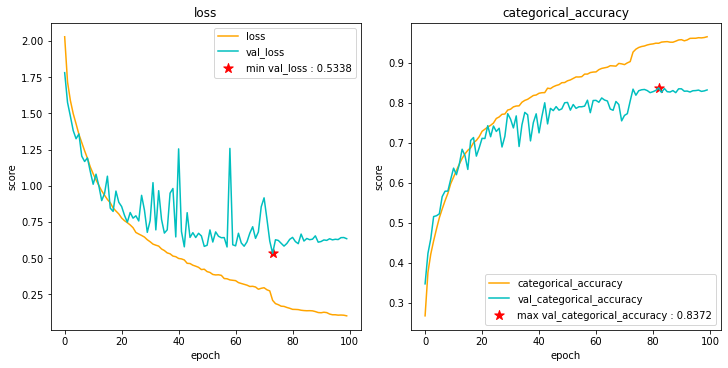

In [2]:
plot_training_hist(pd.read_csv('./saved_hists/resnet50-cifar10-hist.csv'))